In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [ ]:
print(tf.__version__)
print(np.__version__)
import platform
print(platform.python_version())


2.14.0
1.23.5
3.10.12


In [ ]:
# Load your data
df = pd.read_csv('synthetic_homework_data.csv')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Problem Set']),
        ('cat', OneHotEncoder(), ['Subject']),
        ('ord', OrdinalEncoder(), ['Priority'])
    ])


In [ ]:
# Splitting the data
X = df.drop('Time Required to Finish', axis=1)
y = df['Time Required to Finish']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
X_train_transformed.shape[1]

10

In [ ]:
# Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train_transformed.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
# Fit the model and record the history
history = model.fit(X_train_transformed, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
40/40 [==============================] - 1s 7ms/step - loss: 119515.3984 - val_loss: 125793.7656
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 116431.1406 - val_loss: 120411.8281
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 107562.5156 - val_loss: 106264.9141
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 88315.9141 - val_loss: 80060.0078
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 60057.8633 - val_loss: 48840.2695
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 34064.1953 - val_loss: 26895.0996
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 20581.9688 - val_loss: 18318.1113
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 15708.3750 - val_loss: 14894.6670
Epoch 9/10
40/40 [==============================] - 0s 3ms/step - loss: 12948.1611 - val_loss: 12448.8486
Epoch 10/10
40/40 [=====================

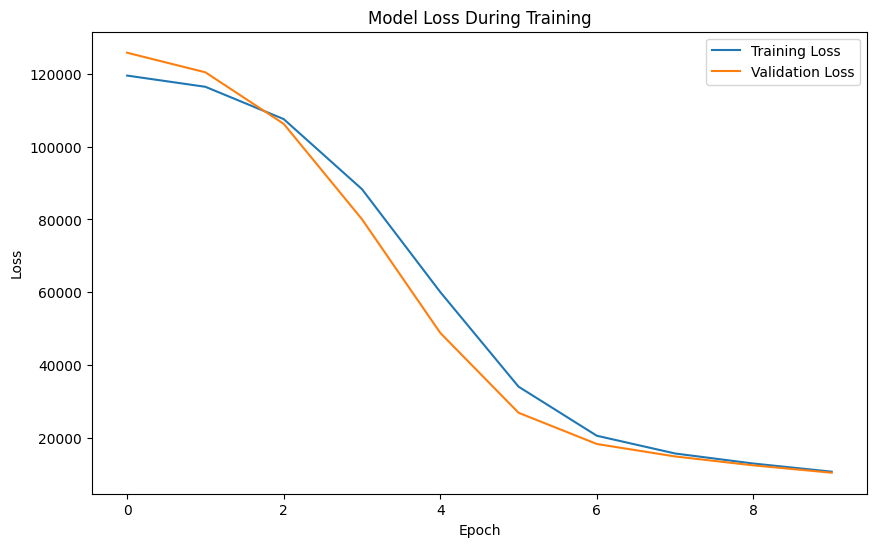

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Make predictions on the test set
y_pred = model.predict(X_test_transformed)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

13/13 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 82.80925258636475
Mean Squared Error (MSE): 10561.224142968354
R-squared Score: 0.5678773100683818


In [ ]:
import pickle


In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [ ]:
model_save_path = 'my_model'
model.save(model_save_path)

In [ ]:
import joblib
joblib.dump(model, 'model_2.pkl')



['model_2.pkl']